In [ ]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from sympy import sqrt, Rational
from matplotlib import pyplot as plt
from sympy.abc import t
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib inline
x, y, z, t, u, c = symbols('x y z t u c')
sp.init_printing() 

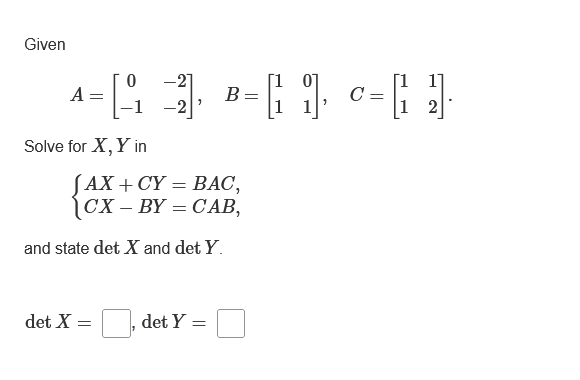

In [7]:

A = Matrix([[0, -2], [-1, -2]])
B = Matrix([[1, 0], [1, 1]]) 
C = Matrix([[1, 1], [1, 2]])

# Calculate BAC and CAB
BAC = B * A * C
CAB = C * A * B

# Define symbolic matrices X and Y
x11, x12, x21, x22 = symbols('x11 x12 x21 x22')
y11, y12, y21, y22 = symbols('y11 y12 y21 y22')

X = Matrix([[x11, x12], [x21, x22]])
Y = Matrix([[y11, y12], [y21, y22]])

# Set up equations: AX + CY = BAC and CX - BY = CAB
eq1 = A * X + C * Y - BAC
eq2 = C * X - B * Y - CAB

# Extract all equations and solve
equations = [eq1[i,j] for i in range(2) for j in range(2)] + [eq2[i,j] for i in range(2) for j in range(2)]
solution = solve(equations, [x11, x12, x21, x22, y11, y12, y21, y22])

# Build solution matrices
X_sol = Matrix([[solution[x11], solution[x12]], [solution[x21], solution[x22]]])
Y_sol = Matrix([[solution[y11], solution[y12]], [solution[y21], solution[y22]]])

# Calculate determinants
det_X = X_sol.det()
det_Y = Y_sol.det()

print(f"det X = {det_X}")
print(f"det Y = {det_Y}")



det X = 10
det Y = 16


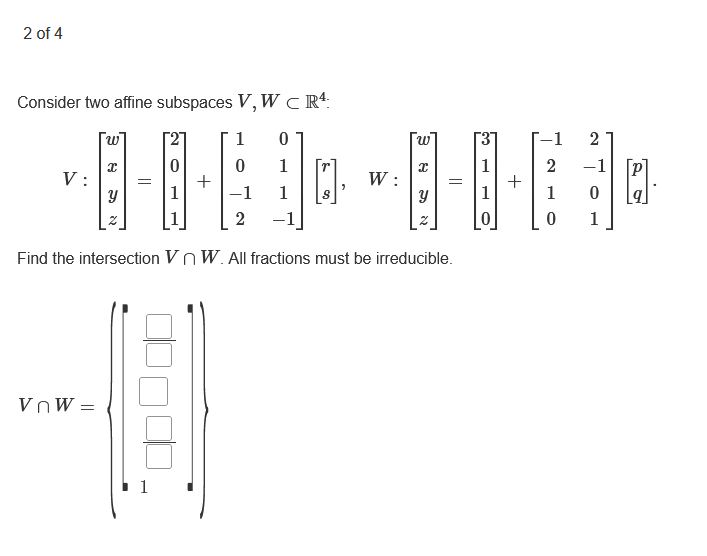

In [8]:
Matrix([[1,0,1,-2, 1],
        [0,1,-2,1,-1],
        [-1,1,-1,0,0],
        [2,-1,0,-1,1]]).rref()[0]

⎡1  0  0  0  -1/2⎤
⎢                ⎥
⎢0  1  0  0   -1 ⎥
⎢                ⎥
⎢0  0  1  0  -1/2⎥
⎢                ⎥
⎣0  0  0  1   -1 ⎦

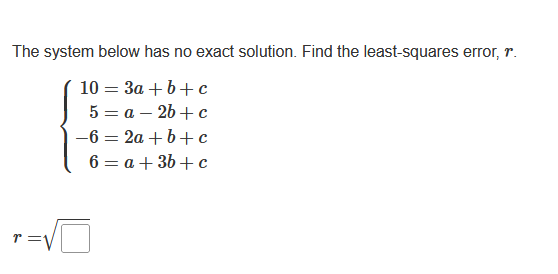

In [11]:


# System: 10 = 3a + b + c, 5 = a - 2b + c, -6 = 2a + b + c, 6 = a + 3b + c
# In matrix form: Ax = b where x = [a, b, c]

A = Matrix([
    [3, 1, 1],
    [1, -2, 1], 
    [2, 1, 1],
    [1, 3, 1]
])

b = Matrix([10, 5, -6, 6])

# Least squares solution: x = (A^T A)^(-1) A^T b
AT = A.T
ATA = AT * A
ATb = AT * b

# Solve for least squares solution
x_ls = ATA.inv() * ATb

# Calculate residual: r_vector = b - Ax
Ax = A * x_ls
residual_vector = b - Ax


# Least squares error is ||residual||
r = sqrt(sum(residual_vector[i]**2 for i in range(residual_vector.rows)))
print(f"\nLeast squares error r = ||b - Ax|| = {r}")
print(f"r = {r.simplify()}")



Least squares error r = ||b - Ax|| = sqrt(138)
r = sqrt(138)


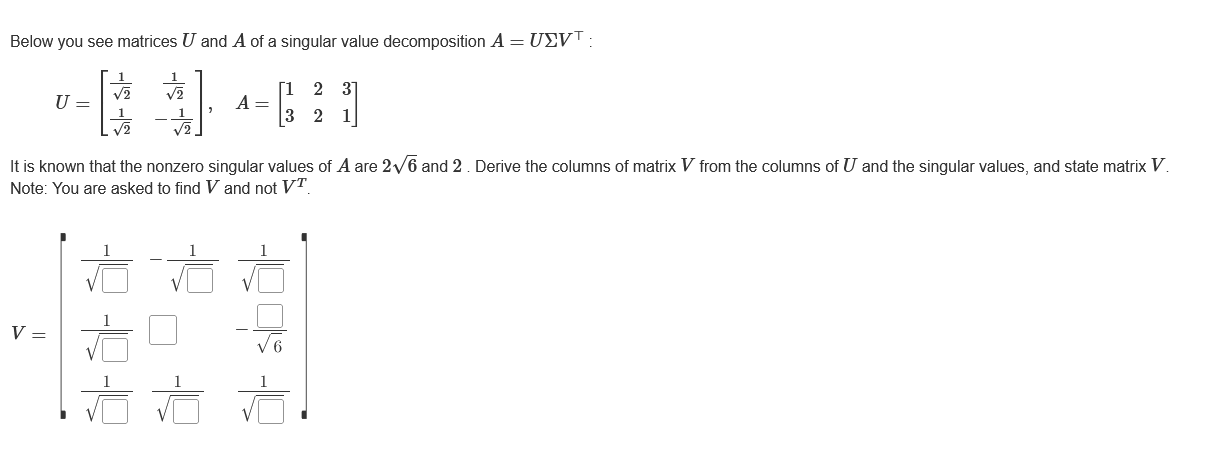

In [19]:

A = Matrix([[1, 2, 3], [3, 2, 1]])

U = Matrix([[Rational(1)/sqrt(2), Rational(1)/sqrt(2)], 
            [Rational(1)/sqrt(2), -Rational(1)/sqrt(2)]])

u1 = U[:, 0]
u2 = U[:, 1]

s1 = 2
s2 = 2*sqrt(6)

vt1 = s1**(-1) * u1.T * A
vt2 = s2**(-1) * u2.T * A

vt3 = Matrix.vstack(vt1, vt2).nullspace()[0].T.normalized()

Vt = Matrix.vstack(vt1, vt2, vt3)
V = Vt.T

print("\nVt = Matrix.vstack(vt1, vt2, vt3)")
print("V = Vt.T")
print("V")



V


Vt = Matrix.vstack(vt1, vt2, vt3)
V = Vt.T
V


⎡        -√3                     ⎤
⎢1.0⋅√2  ────  0.408248290463863 ⎥
⎢         6                      ⎥
⎢                                ⎥
⎢1.0⋅√2   0    -0.816496580927726⎥
⎢                                ⎥
⎢         √3                     ⎥
⎢1.0⋅√2   ──   0.408248290463863 ⎥
⎣         6                      ⎦